In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import upsetplot as up
import ast



from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()


prefix = '/home/klawren/oak/pcqtls'

import sys
sys.path.append('/home/klawren/oak/pcqtls/workflow/scripts')
from notebook_helper_functions import *

In [2]:
main_config_path= f'{prefix}/config/proteincoding_high_corr_skip.yaml'
with open(main_config_path, 'r') as f:
    config = yaml.safe_load(f)

tissue_ids = load_tissue_ids(config)


In [3]:
gwas_meta = pd.read_csv(config['gwas_meta'], sep='\t', header=0)
gwas_ids = gwas_meta['Tag']

In [100]:
coloc_cutoff = .75

## load in the completed cluster gwas colocs

In [4]:

# Function to recursively get list of files ending with .qtl_gwas.txt
# this should later be updated to exclude the emp files

# version for only complete results 
def get_files(directory):
    file_list = []
    for root, directories, files in os.walk(directory):
        if not 'temp' in root:
            for file in files:
                if "susie_FALSE" in file:
                    file_list.append(os.path.join(root, file))
    return file_list


# # version for partially complete results too
# def get_files(directory):
#     file_list = []
#     for root, directories, files in os.walk(directory):
#         for file in files:
#             if "susie_FALSE" in file:
#                 file_list.append(os.path.join(root, file))
#     return file_list

# Get the list of files
coloc_file_list = get_files('{}/{}'.format(prefix, config['coloc_output_dir']))
len(coloc_file_list)

1477

In [21]:

# Load each file into a DataFrame and concatenate them
cluster_colocs = []
for cluster_file in tqdm(coloc_file_list):
    cluster_coloc = pd.read_csv(cluster_file, sep='\t')  # Assuming tab-separated file
    tissue_id = cluster_file.split('/')[8]
    cluster_coloc['tissue_id'] = tissue_id
    cluster_colocs.append(cluster_coloc)

# Concatenate all DataFrames into a single DataFrame
gwas_coloc = pd.concat(cluster_colocs, ignore_index=True)
gwas_coloc['cluster_id'] = np.where(gwas_coloc['qtl_id'].str.contains('_e'), gwas_coloc['qtl_id'].str.split('_e').str[0], gwas_coloc['qtl_id'].str.split('_pc').str[0])
# Print the combined DataFrame
gwas_coloc

  0%|          | 0/1477 [00:00<?, ?it/s]

,gwas_id,qtl_id,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,tissue_id,cluster_id
0,Astle_et_al_2016_Granulocyte_count,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...,6495,3.168229e-12,1.696100e-07,1.867913e-05,0.999981,3.622718e-07,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...
1,Astle_et_al_2016_Granulocyte_count,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...,6495,3.867661e-24,2.070539e-19,1.867914e-05,0.999981,3.602499e-07,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...
2,Astle_et_al_2016_Granulocyte_count,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...,6495,1.201913e-17,6.434398e-13,1.867914e-05,0.999981,3.602500e-07,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000171722.12_ENSG00000198929.12_ENSG0000...
3,Astle_et_al_2016_Granulocyte_count,ENSG00000158481.12_ENSG00000158485.10_ENSG0000...,6130,9.462748e-24,4.229839e-02,2.141537e-22,0.957265,4.370131e-04,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000158481.12_ENSG00000158485.10_ENSG0000...
4,Astle_et_al_2016_Granulocyte_count,ENSG00000158481.12_ENSG00000158485.10_ENSG0000...,6130,1.097613e-28,4.906320e-07,2.237140e-22,1.000000,4.891252e-09,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000158481.12_ENSG00000158485.10_ENSG0000...
...,...,...,...,...,...,...,...,...,...,...
85776,GIANT_WC_Combined_EUR,ENSG00000129204.16_ENSG00000167840.13_pc2,1489,6.145130e-01,3.588566e-01,1.013055e-02,0.005905,1.059454e-02,Adipose_Subcutaneous,ENSG00000129204.16_ENSG00000167840.13
85777,GIANT_WC_Combined_EUR,ENSG00000108556.7_ENSG00000205710.3_e_ENSG0000...,1449,7.301586e-68,4.329153e-68,6.249878e-01,0.370554,4.457692e-03,Adipose_Subcutaneous,ENSG00000108556.7_ENSG00000205710.3
85778,GIANT_WC_Combined_EUR,ENSG00000108556.7_ENSG00000205710.3_e_ENSG0000...,1449,1.302289e-93,7.721350e-94,6.252938e-01,0.370736,3.969738e-03,Adipose_Subcutaneous,ENSG00000108556.7_ENSG00000205710.3
85779,GIANT_WC_Combined_EUR,ENSG00000108556.7_ENSG00000205710.3_pc1,1449,7.638976e-105,4.529194e-105,6.250917e-01,0.370616,4.292051e-03,Adipose_Subcutaneous,ENSG00000108556.7_ENSG00000205710.3


In [22]:
# duplicate rows from intermediate write outs
gwas_coloc = gwas_coloc.drop_duplicates()
len(gwas_coloc)

85781

In [23]:
gwas_coloc_melted  = gwas_coloc.melt(id_vars=['tissue_id', 'gwas_id', 'qtl_id'], value_name='prob', var_name='prob_type', value_vars=[f'PP.H{i}.abf' for i in range(5)])

some plots about coloc prob distributions

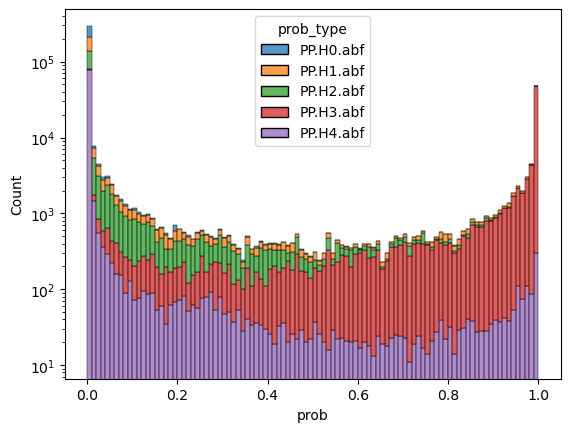

In [24]:
ax = sns.histplot(gwas_coloc_melted, x='prob', hue='prob_type', bins=100, multiple='stack')
ax.set_yscale('log')

<AxesSubplot: xlabel='count', ylabel='highest_prob'>

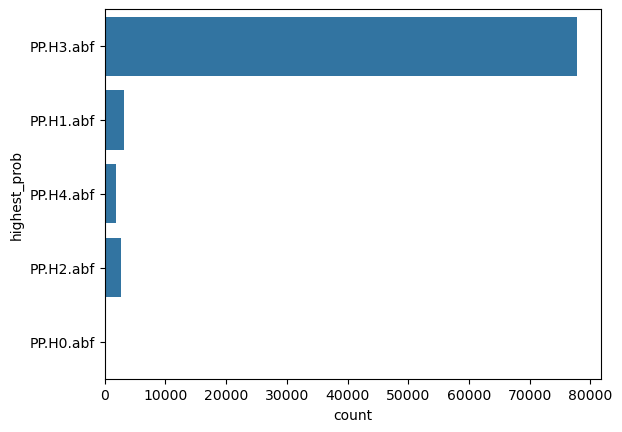

In [25]:
# plot of which hypothesis is most probable for each row
gwas_coloc['highest_prob'] = gwas_coloc[['PP.H0.abf', 'PP.H1.abf', 'PP.H2.abf', 'PP.H3.abf', 'PP.H4.abf']].idxmax(axis=1)
sns.countplot(gwas_coloc['highest_prob'])

In [26]:
# make ids for each credible set in the qtl and gwas
# if susie
#gwas_coloc['gwas_cs_id'] = gwas_coloc['gwas_id'] + '_' + gwas_coloc['hit1']
#gwas_coloc['qtl_cs_id'] = gwas_coloc['qtl_id'] + '_' + gwas_coloc['hit2'].astype(str)

# otherwise
gwas_coloc['gwas_cs_id'] = gwas_coloc['gwas_id'] + '_cluster_' + gwas_coloc['cluster_id']
gwas_coloc['qtl_cs_id'] = gwas_coloc['qtl_id']+ '_cluster_' + gwas_coloc['cluster_id']
gwas_coloc['type'] = np.where(gwas_coloc['qtl_cs_id'].str.contains('_pc'), 'pcqtl', 'eqtl')


In [101]:
eqtl_pp4 = gwas_coloc[gwas_coloc['type']=='eqtl'].groupby('gwas_cs_id').agg({'PP.H4.abf':max})
pcqtl_pp4 = gwas_coloc[gwas_coloc['type']=='pcqtl'].groupby('gwas_cs_id').agg({'PP.H4.abf':max})
pph4 = pcqtl_pp4.join(eqtl_pp4, rsuffix='_e', lsuffix='_pc')
pph4['colocalized'] = (pph4['PP.H4.abf_e'] > coloc_cutoff)| (pph4['PP.H4.abf_pc'] >coloc_cutoff )

In [102]:
len(pph4)

10272

In [103]:
((pph4['PP.H4.abf_pc']<coloc_cutoff) & (pph4['PP.H4.abf_e']>coloc_cutoff)).sum()

78

In [105]:
((pph4['PP.H4.abf_e']<coloc_cutoff) & (pph4['PP.H4.abf_pc']>coloc_cutoff)).sum()

88

<AxesSubplot: xlabel='PP.H4.abf_e', ylabel='PP.H4.abf_pc'>

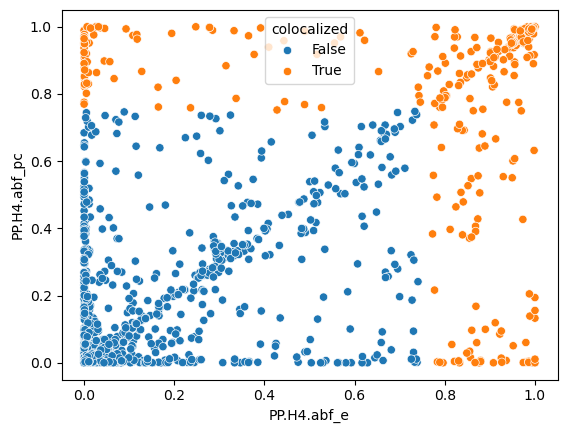

In [106]:

sns.scatterplot(pph4, x='PP.H4.abf_e', y='PP.H4.abf_pc', hue='colocalized')

In [107]:
gwas_coloc[gwas_coloc['PP.H4.abf'] > coloc_cutoff]

,gwas_id,qtl_id,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,tissue_id,cluster_id,highest_prob,gwas_cs_id,qtl_cs_id,type,cluster_size,pc_num,first_pc,last_pc,middle_pc,qtl_sig
97,Astle_et_al_2016_Granulocyte_count,ENSG00000134824.13_ENSG00000149485.18_pc2,3891,3.434862e-18,9.562433e-11,1.558807e-09,0.042439,0.957561,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,Astle_et_al_2016_Granulocyte_count_cluster_ENS...,ENSG00000134824.13_ENSG00000149485.18_pc2_clus...,pcqtl,2,2,False,True,False,True
314,Astle_et_al_2016_Neutrophil_count,ENSG00000134824.13_ENSG00000149485.18_pc2,3891,4.697851e-16,1.163037e-10,2.131975e-07,0.051833,0.948167,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,Astle_et_al_2016_Neutrophil_count_cluster_ENSG...,ENSG00000134824.13_ENSG00000149485.18_pc2_clus...,pcqtl,2,2,False,True,False,True
428,GLGC_Mc_HDL,ENSG00000134824.13_ENSG00000149485.18_pc2,1105,2.601623e-32,3.001023e-10,9.786835e-24,0.112005,0.887995,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,GLGC_Mc_HDL_cluster_ENSG00000134824.13_ENSG000...,ENSG00000134824.13_ENSG00000149485.18_pc2_clus...,pcqtl,2,2,False,True,False,True
744,Astle_et_al_2016_Sum_eosinophil_basophil_counts,ENSG00000134824.13_ENSG00000149485.18_pc2,3891,4.810292e-15,1.569061e-10,2.183003e-06,0.070277,0.929721,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,Astle_et_al_2016_Sum_eosinophil_basophil_count...,ENSG00000134824.13_ENSG00000149485.18_pc2_clus...,pcqtl,2,2,False,True,False,True
750,Astle_et_al_2016_Sum_eosinophil_basophil_counts,ENSG00000123411.14_ENSG00000139531.12_ENSG0000...,3897,6.693358e-49,5.956667e-43,2.200591e-08,0.018602,0.981397,Skin_Not_Sun_Exposed_Suprapubic,ENSG00000123411.14_ENSG00000139531.12_ENSG0000...,PP.H4.abf,Astle_et_al_2016_Sum_eosinophil_basophil_count...,ENSG00000123411.14_ENSG00000139531.12_ENSG0000...,eqtl,3,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85363,GLGC_Mc_HDL,ENSG00000134824.13_ENSG00000149485.18_e_ENSG00...,1106,2.641256e-25,3.046741e-03,1.438372e-23,0.165087,0.831866,Adipose_Subcutaneous,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,GLGC_Mc_HDL_cluster_ENSG00000134824.13_ENSG000...,ENSG00000134824.13_ENSG00000149485.18_e_ENSG00...,eqtl,2,0,False,False,False,True
85434,Astle_et_al_2016_Neutrophil_count,ENSG00000115232.13_ENSG00000188452.13_pc1,5527,9.095519e-09,2.163055e-03,4.693741e-08,0.010175,0.987662,Adipose_Subcutaneous,ENSG00000115232.13_ENSG00000188452.13,PP.H4.abf,Astle_et_al_2016_Neutrophil_count_cluster_ENSG...,ENSG00000115232.13_ENSG00000188452.13_pc1_clus...,pcqtl,2,1,True,False,False,True
85468,Astle_et_al_2016_Neutrophil_count,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,16015,3.422103e-68,1.736321e-17,3.519447e-52,0.178319,0.821681,Adipose_Subcutaneous,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,PP.H4.abf,Astle_et_al_2016_Neutrophil_count_cluster_ENSG...,ENSG00000179344.16_ENSG00000196126.11_ENSG0000...,eqtl,7,0,False,False,False,True
85516,Astle_et_al_2016_Neutrophil_count,ENSG00000134824.13_ENSG00000149485.18_e_ENSG00...,3891,1.931695e-09,4.782259e-04,1.306192e-07,0.031369,0.968153,Adipose_Subcutaneous,ENSG00000134824.13_ENSG00000149485.18,PP.H4.abf,Astle_et_al_2016_Neutrophil_count_cluster_ENSG...,ENSG00000134824.13_ENSG00000149485.18_e_ENSG00...,eqtl,2,0,False,False,False,True


first look just at the number of hits, not trying to overlap pc and eqtls 

In [108]:
# count number of e and pc hits
gwas_coloc_hits = gwas_coloc[gwas_coloc['PP.H4.abf'] > coloc_cutoff]
print('number pcqtls total (could overlap): {}'.format(sum(gwas_coloc_hits['qtl_cs_id'].str.contains('_pc'))))
print('number eqtls total (could overlap):{}'.format(sum(gwas_coloc_hits['qtl_cs_id'].str.contains('_e'))))

number pcqtls total (could overlap): 620
number eqtls total (could overlap):699


/local/scratch/klawren/slrmtmp.46562935/ipykernel_48962/3043241985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_coloc_hits['type'] = np.where(gwas_coloc_hits['qtl_cs_id'].str.contains('_pc'), 'pcqtl', 'eqtl')


<AxesSubplot: xlabel='Count', ylabel='tissue_id'>

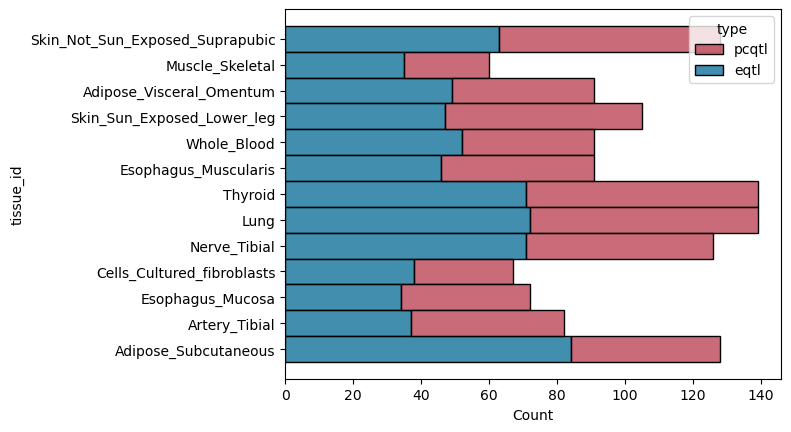

In [109]:
# raw counts (could overlap)
gwas_coloc_hits['type'] = np.where(gwas_coloc_hits['qtl_cs_id'].str.contains('_pc'), 'pcqtl', 'eqtl')
sns.histplot(gwas_coloc_hits, hue='type', y='tissue_id', multiple='stack', hue_order=['pcqtl','eqtl'], 
             palette=('#B83A4B', '#016895'))

In [110]:
gwas_coloc_counts = gwas_coloc_hits.groupby('tissue_id').agg({'qtl_cs_id':'unique'})
gwas_coloc_counts['num_e'] = gwas_coloc_counts['qtl_cs_id'].astype(str).str.count('_e')
gwas_coloc_counts['num_pc'] = gwas_coloc_counts['qtl_cs_id'].astype(str).str.count('_pc')
gwas_coloc_counts['num_colocs'] = gwas_coloc_counts['num_e'] + gwas_coloc_counts['num_pc']

gwas_coloc_counts

,qtl_cs_id,num_e,num_pc,num_colocs
tissue_id,,,,
Adipose_Subcutaneous,[ENSG00000115232.13_ENSG00000188452.13_pc1_clu...,34,25,59
Adipose_Visceral_Omentum,[ENSG00000179344.16_ENSG00000196126.11_ENSG000...,28,23,51
Artery_Tibial,[ENSG00000166275.15_ENSG00000214435.7_pc2_clus...,22,27,49
Cells_Cultured_fibroblasts,[ENSG00000108688.11_ENSG00000108691.9_e_ENSG00...,23,19,42
Esophagus_Mucosa,[ENSG00000176681.14_ENSG00000185829.17_ENSG000...,26,25,51
Esophagus_Muscularis,[ENSG00000179344.16_ENSG00000196735.11_ENSG000...,27,22,49
Lung,[ENSG00000179344.16_ENSG00000196126.11_ENSG000...,27,31,58
Muscle_Skeletal,[ENSG00000124067.16_ENSG00000213398.7_e_ENSG00...,22,20,42
Nerve_Tibial,[ENSG00000179344.16_ENSG00000196126.11_ENSG000...,39,29,68


/local/scratch/klawren/slrmtmp.46562935/ipykernel_48962/1038350952.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tissue_labels)


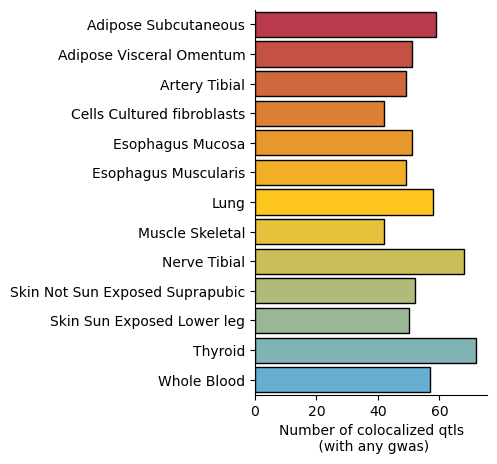

In [111]:
# make a simple plot with total colocs in each tissue (the signals could overlap)
tissue_pal = sns.color_palette('blend:#B83A4B,#FEC51D,#67AFD2', n_colors=len(tissue_ids))


# plot showing number of clusters in each tissue

fig, ax = plt.subplots(figsize=(3,5))
ax = sns.barplot(gwas_coloc_counts, x='num_colocs', hue='tissue_id', y='tissue_id', palette=tissue_pal, saturation=1, edgecolor='k', width=.85, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Replace underscores with spaces in the tissue labels
tissue_labels = ax.get_yticklabels()
tissue_labels = [tissue_label.get_text().replace('_', ' ') for tissue_label in tissue_labels]
ax.set_yticklabels(tissue_labels)

ax.set_xlabel('Number of colocalized qtls\n (with any gwas)')
ax.set_ylabel('')

plt.show()

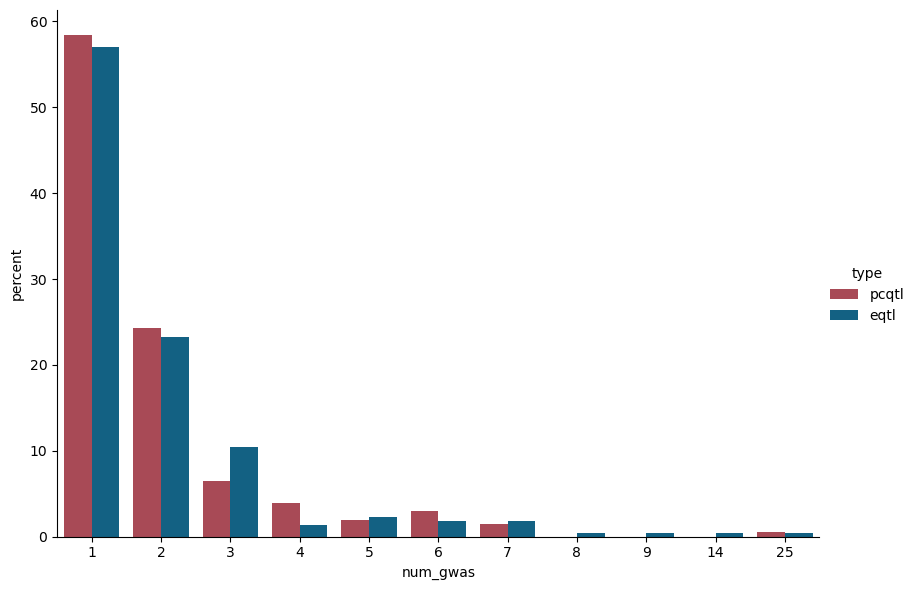

In [112]:
# number of gwas hits per qtl
gwas_grouped_colocs = gwas_coloc_hits.groupby('qtl_cs_id').agg({'gwas_cs_id':'unique', 
                                                             'type':'first'})
gwas_grouped_colocs['num_gwas'] = gwas_grouped_colocs['gwas_cs_id'].apply(len)
data_to_plot = gwas_grouped_colocs.groupby('type')['num_gwas'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.catplot(data_to_plot, x='num_gwas',y='percent',hue='type',kind='bar',height=6, aspect=1.4, hue_order=['pcqtl','eqtl'], palette=('#B83A4B', '#016895'))


if there are a lot of high numbers in the above plot, I may need to rethink not combining over gwas loci in some way below. currently if a an eqtl loci colocs with 3 gwas loci, that counts for 3 colocs in the below plots?

now combine around gwas signals - does each one colocalize to a pcqtl, an eqtl, or multiple pcqtls?

In [113]:
# group by qtl signal
gwas_coloc_overlap = gwas_coloc_hits.groupby(['gwas_cs_id', 'tissue_id']).agg({'qtl_cs_id':'unique'})

# count things
gwas_coloc_overlap['num_hits'] = gwas_coloc_overlap['qtl_cs_id'].apply(len)
gwas_coloc_overlap['num_eqtl'] = gwas_coloc_overlap['qtl_cs_id'].astype(str).str.count('_e')
gwas_coloc_overlap['num_pcqtl'] = gwas_coloc_overlap['qtl_cs_id'].astype(str).str.count('_pc')
gwas_coloc_overlap['hit_type'] = np.where(gwas_coloc_overlap['num_eqtl']>0, np.where(gwas_coloc_overlap['num_pcqtl']>0, 'both', 'eqtl_only'), 
                                          np.where(gwas_coloc_overlap['num_pcqtl']>0, 'pcqtl_only', 'neither??'))

/local/scratch/klawren/slrmtmp.46562935/ipykernel_48962/3260416558.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tissue_labels)


Text(0.5, 0, 'Number of colocalized QTLs (each gwas counts seperately)')

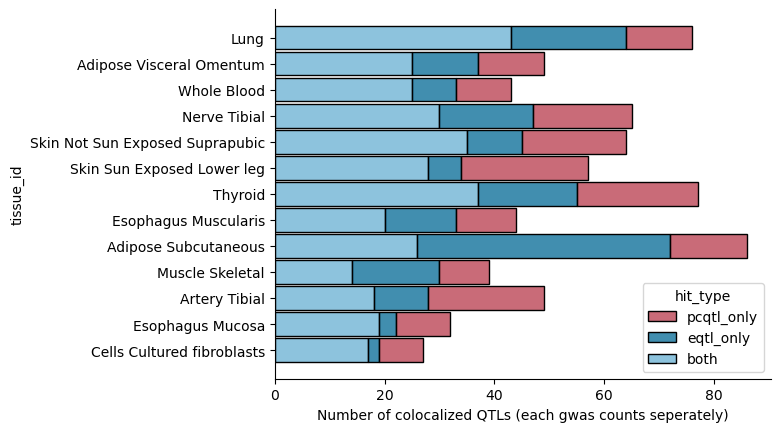

In [114]:
# histogram with gtle type

ax = sns.histplot(gwas_coloc_overlap, y='tissue_id', hue='hit_type', multiple='stack', 
             hue_order=['pcqtl_only','eqtl_only', 'both'], 
             palette=('#B83A4B', '#016895', '#67AFD2'), 
             shrink=.9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Replace underscores with spaces in the tissue labels
tissue_labels = ax.get_yticklabels()
tissue_labels = [tissue_label.get_text().replace('_', ' ') for tissue_label in tissue_labels]
ax.set_yticklabels(tissue_labels)

ax.set_xlabel('Number of colocalized QTLs (each gwas counts seperately)')


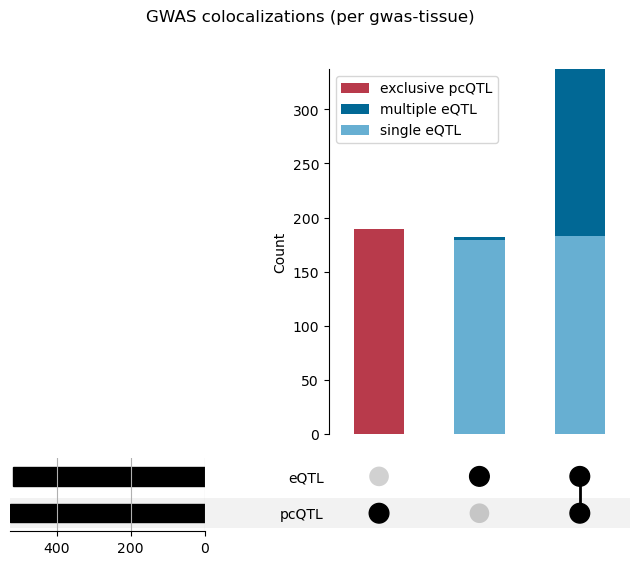

In [115]:
# make indicator columns 
gwas_coloc_overlap['pcQTL'] = gwas_coloc_overlap['num_pcqtl'] > 0
gwas_coloc_overlap['eQTL'] = gwas_coloc_overlap['num_eqtl'] > 0

# multiple egenes
gwas_coloc_overlap['multiple_e_shared'] = gwas_coloc_overlap['num_eqtl']>1  

upset_to_plot = gwas_coloc_overlap.set_index('eQTL').set_index('pcQTL', append=True)

upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['multiple_e_shared'], 'multiple eQTL', 'single eQTL')
upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['num_eqtl'] > 0, upset_to_plot['multiple_e_shared_label'], 'exclusive pcQTL')

fig = plt.figure(figsize=(8, 6))
upset = up.UpSet(upset_to_plot, intersection_plot_elements=0,show_counts=False, element_size=None)  # disable the default bar chart
upset.add_stacked_bars(by="multiple_e_shared_label", title="Count", elements=8, colors=('#B83A4B', '#016895', '#67AFD2'))

params = {"legend.fontsize": 10}
with plt.rc_context(params):
    upset.plot(fig=fig)

plt.grid(False)


plt.suptitle('GWAS colocalizations (per gwas-tissue)')
plt.show()

now make it  so that each gwas doesn't count seperately

In [116]:
# something about tissue sharing??
gwas_coloc_hits['gwas_tissue_cs_id'] = gwas_coloc_hits['gwas_cs_id'] + '_tissue_' + gwas_coloc_hits['tissue_id']
gwas_coloc_hits['qtl_tissue_cs_id'] = gwas_coloc_hits['qtl_cs_id'] + '_tissue_' + gwas_coloc_hits['tissue_id']

qtl_grouped_colocs = gwas_coloc_hits.groupby('qtl_tissue_cs_id').agg({'gwas_tissue_cs_id':'unique'})
gwas_grouped_colocs = gwas_coloc_hits.groupby('gwas_tissue_cs_id').agg({'qtl_tissue_cs_id':'unique'})

/local/scratch/klawren/slrmtmp.46562935/ipykernel_48962/1830729303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_coloc_hits['gwas_tissue_cs_id'] = gwas_coloc_hits['gwas_cs_id'] + '_tissue_' + gwas_coloc_hits['tissue_id']
/local/scratch/klawren/slrmtmp.46562935/ipykernel_48962/1830729303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_coloc_hits['qtl_tissue_cs_id'] = gwas_coloc_hits['qtl_cs_id'] + '_tissue_' + gwas_coloc_hits['tissue_id']


In [117]:
qtl_sets = []
gwas_sets = []
for idx, row in gwas_grouped_colocs.iterrows():
    qtl_set = set(row['qtl_tissue_cs_id'].astype(list))
    new_qtls = 1
    new_gwas = 1
    gwas_set = set([idx])
    # expand the set to all overlapping qtls and gwas
    while ((new_qtls > 0) | (new_gwas > 1)):
        gwas_set_old = gwas_set
        qtl_set_old = qtl_set
        for gwas_cs_id in gwas_set:
            qtl_set = set(np.append(list(qtl_set), gwas_grouped_colocs.loc[gwas_cs_id,'qtl_tissue_cs_id']))
        new_qtls = len(qtl_set) - len(qtl_set_old)
        for qtl_cs_id in qtl_set:
            gwas_set = set(np.append(list(gwas_set), qtl_grouped_colocs.loc[qtl_cs_id,'gwas_tissue_cs_id']))
        new_gwas = len(gwas_set) - len(gwas_set_old)

    qtl_sets.append(set(qtl_set))
    gwas_sets.append(set(gwas_set))


coloc_sets = pd.DataFrame({'gwas_sets':gwas_sets, 
              'qtl_sets':qtl_sets})

coloc_sets['sorted_gwas_sets'] = coloc_sets['gwas_sets'].apply(lambda x: sorted(list(x))).astype(str)
coloc_sets['sorted_qtl_sets'] = coloc_sets['qtl_sets'].apply(lambda x: sorted(list(x))).astype(str)

coloc_sets = coloc_sets[['sorted_gwas_sets', 'sorted_qtl_sets']].drop_duplicates()

# these should all be the same
print(len(coloc_sets))
print(len(coloc_sets['sorted_gwas_sets'].unique()))
print(len(coloc_sets['sorted_qtl_sets'].unique()))

coloc_sets['num_eqtl'] = coloc_sets['sorted_qtl_sets'].str.count('_e')
coloc_sets['num_pcqtl'] = coloc_sets['sorted_qtl_sets'].str.count('_pc')
coloc_sets['num_pc1'] = coloc_sets['sorted_qtl_sets'].str.count('_pc1')
coloc_sets['num_pc2+'] = coloc_sets['num_pcqtl'] - coloc_sets['num_pc1']



361
341
361


In [118]:
def get_tissue_ids(signal_set):
    tissue_ids = []
    for signal_id in ast.literal_eval(signal_set):
        tissue_ids.append(signal_id.split('_tissue_')[-1])
    return list(set(tissue_ids))

def get_gwas_pheno_ids(signal_set):
    gwas_ids = []
    for signal_id in ast.literal_eval(signal_set):
        gwas_ids.append(signal_id.split('_cluster_')[0])
    return list(set(gwas_ids))

def get_qtl_cluster_ids(signal_set):
    cluster_ids = []
    for signal_id in ast.literal_eval(signal_set):
        cluster_ids.append(signal_id.split('_cluster_')[1].split('_tissue_')[0])
    return list(set(cluster_ids))

In [119]:
coloc_sets['qtl_tissues'] = coloc_sets['sorted_qtl_sets'].apply(get_tissue_ids)
coloc_sets['qtl_clusters'] = coloc_sets['sorted_qtl_sets'].apply(get_qtl_cluster_ids)
coloc_sets['num_clusters'] = coloc_sets['qtl_clusters'].apply(len)
coloc_sets['num_qtl_tissues'] = coloc_sets['qtl_tissues'].apply(len)


coloc_sets['gwas_tissues'] = coloc_sets['sorted_gwas_sets'].apply(get_tissue_ids)
coloc_sets['gwas_types'] = coloc_sets['sorted_gwas_sets'].apply(get_gwas_pheno_ids)
coloc_sets['num_gwas_tissues'] = coloc_sets['gwas_tissues'].apply(len)
coloc_sets['num_gwas_types'] = coloc_sets['gwas_types'].apply(len)

coloc_sets['type'] = np.where(coloc_sets['num_pcqtl']>0, np.where(coloc_sets['num_eqtl']>0, 'both', 'pcqtl_only'), 'eqtl_only')

In [120]:
coloc_sets['sorted_qtl_sets'].iloc[0]

"['ENSG00000055955.15_ENSG00000213533.11_ENSG00000272573.5_pc2_cluster_ENSG00000055955.15_ENSG00000213533.11_ENSG00000272573.5_tissue_Lung']"

In [121]:
# add first middle last to pcs
for idx, row in tqdm(coloc_sets.iterrows()):
    first_pcs = 0
    middle_pcs = 0
    last_pcs = 0
    for qtl_id in ast.literal_eval(row['sorted_qtl_sets']):
        if 'pc' in qtl_id:
            cluster_size = len(qtl_id.split('_cluster_')[1].split('_tissue_')[0].split('_'))
            pc_num = int(qtl_id.split('_pc')[1].split('_cluster')[0])
            if cluster_size == pc_num:
                middle_pcs +=1
            elif pc_num==1:
                first_pcs +=1
            else:
                last_pcs+=1
    coloc_sets.loc[idx, 'num_pc_first'] = first_pcs
    coloc_sets.loc[idx, 'num_pc_middle'] = middle_pcs
    coloc_sets.loc[idx, 'num_pc_last'] = last_pcs

0it [00:00, ?it/s]

In [122]:
coloc_sets['num_pcqtl'].sum()

346

<AxesSubplot: xlabel='num_gwas_tissues', ylabel='count'>

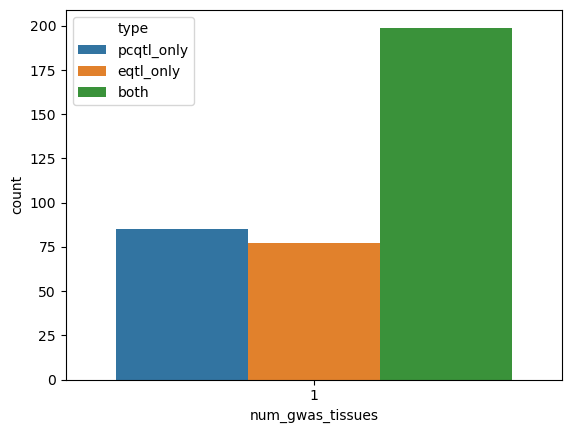

In [123]:
# number of tissues vs signal type
sns.countplot(coloc_sets, x='num_gwas_tissues', hue='type')


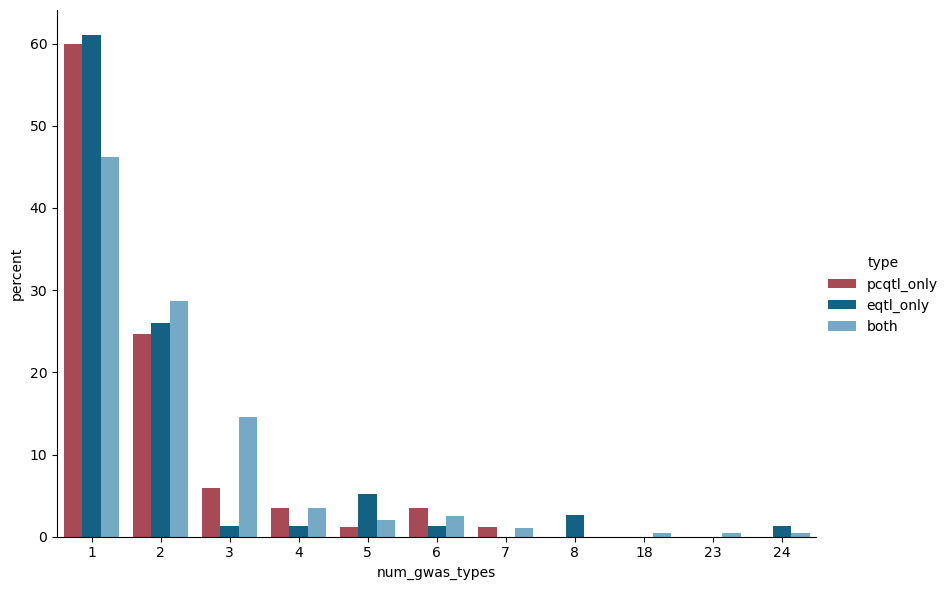

In [124]:
data_to_plot = coloc_sets.groupby('type')['num_gwas_types'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.catplot(data_to_plot, x='num_gwas_types',y='percent',hue='type',kind='bar',height=6, aspect=1.4, 
            hue_order=['pcqtl_only','eqtl_only', 'both'], 
            palette=('#B83A4B', '#016895', '#67AFD2'))


<AxesSubplot: xlabel='num_qtl_tissues', ylabel='count'>

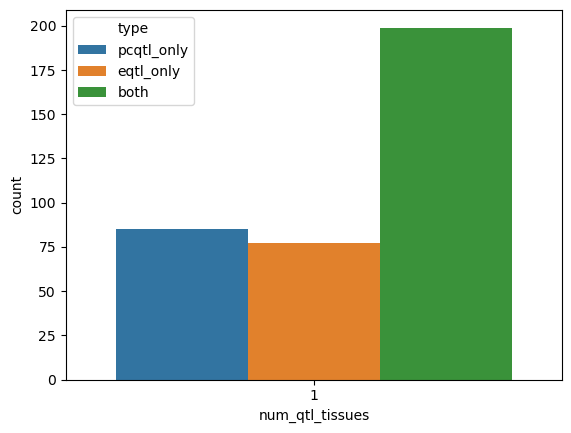

In [125]:
sns.countplot(coloc_sets, x='num_qtl_tissues', hue='type')

<AxesSubplot: xlabel='num_clusters', ylabel='count'>

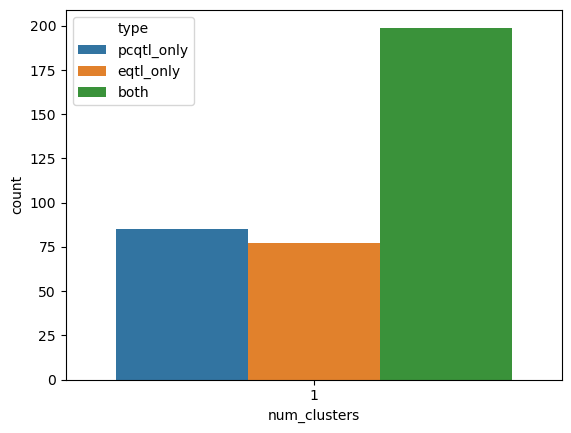

In [126]:
# ideally this should be all 1
sns.countplot(coloc_sets, x='num_clusters', hue='type')

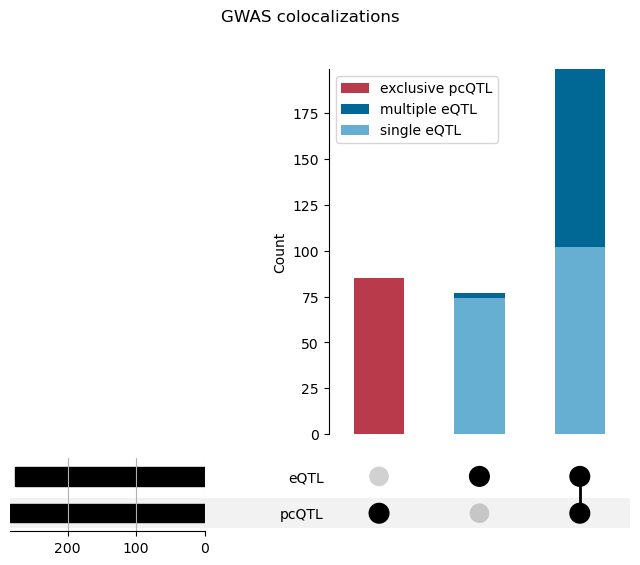

In [127]:
# make indicator columns 
coloc_sets['pcQTL'] = coloc_sets['num_pcqtl'] > 0
coloc_sets['eQTL'] = coloc_sets['num_eqtl'] > 0

# multiple egenes
coloc_sets['multiple_e_shared'] = coloc_sets['num_eqtl']>1  

upset_to_plot = coloc_sets.set_index('eQTL').set_index('pcQTL', append=True)

upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['multiple_e_shared'], 'multiple eQTL', 'single eQTL')
upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['num_eqtl'] > 0, upset_to_plot['multiple_e_shared_label'], 'exclusive pcQTL')

fig = plt.figure(figsize=(8, 6))
upset = up.UpSet(upset_to_plot, intersection_plot_elements=0,show_counts=False, element_size=None)  # disable the default bar chart
upset.add_stacked_bars(by="multiple_e_shared_label", title="Count", elements=8, colors=('#B83A4B', '#016895', '#67AFD2'))

params = {"legend.fontsize": 10}
with plt.rc_context(params):
    upset.plot(fig=fig)

plt.grid(False)


plt.suptitle('GWAS colocalizations')
plt.show()

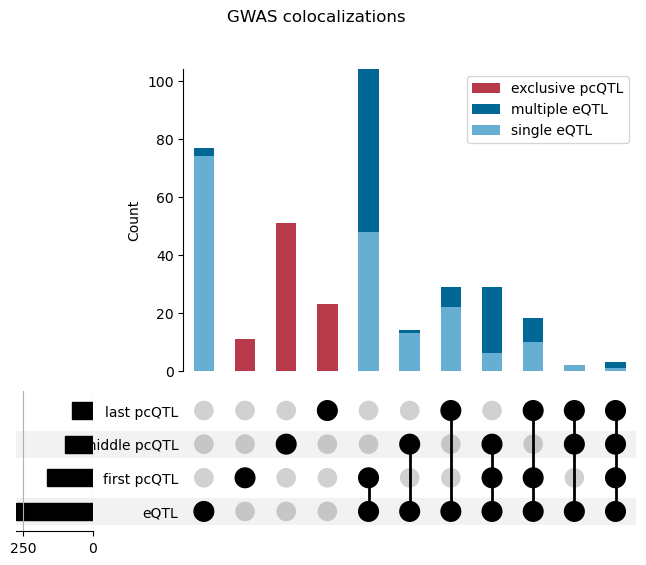

In [128]:
# make indicator columns 
coloc_sets['first pcQTL'] = coloc_sets['num_pc_first'] > 0
coloc_sets['middle pcQTL'] = coloc_sets['num_pc_middle'] > 0
coloc_sets['last pcQTL'] = coloc_sets['num_pc_last'] > 0



# multiple egenes
coloc_sets['multiple_e_shared'] = coloc_sets['num_eqtl']>1  

upset_to_plot = coloc_sets.set_index('eQTL').set_index('first pcQTL', append=True).set_index('middle pcQTL', append=True).set_index('last pcQTL', append=True)

upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['multiple_e_shared'], 'multiple eQTL', 'single eQTL')
upset_to_plot['multiple_e_shared_label'] = np.where(upset_to_plot['num_eqtl'] > 0, upset_to_plot['multiple_e_shared_label'], 'exclusive pcQTL')

fig = plt.figure(figsize=(8, 6))
upset = up.UpSet(upset_to_plot, intersection_plot_elements=0,show_counts=False, element_size=None)  # disable the default bar chart
upset.add_stacked_bars(by="multiple_e_shared_label", title="Count", elements=8, colors=('#B83A4B', '#016895', '#67AFD2'))

params = {"legend.fontsize": 10}
with plt.rc_context(params):
    upset.plot(fig=fig)

plt.grid(False)


plt.suptitle('GWAS colocalizations')
plt.show()

what fraction of each colocalize?

In [237]:
#list of all qtls, not from overlap becuase I don't want credible sets
# the list of all with a signal just the h1, h3, and h4 from the coloc
gwas_coloc['cluster_size'] = gwas_coloc['cluster_id'].str.split('_').apply(len)
gwas_coloc['pc_num'] = np.where(gwas_coloc['qtl_id'].str.contains('pc'), gwas_coloc['qtl_id'].str.split('_pc').str[1] ,0).astype(int)
gwas_coloc['first_pc'] = gwas_coloc['pc_num'] == 1
gwas_coloc['last_pc'] = gwas_coloc['pc_num'] == gwas_coloc['cluster_size']
gwas_coloc['middle_pc'] = (gwas_coloc['pc_num'] > 1) & (gwas_coloc['pc_num'] != gwas_coloc['cluster_size'])

In [238]:
gwas_coloc['qtl_sig'] = (gwas_coloc['PP.H1.abf'] > coloc_cutoff) | (gwas_coloc['PP.H3.abf'] > coloc_cutoff) | (gwas_coloc['PP.H4.abf'] > coloc_cutoff)
gwas_coloc['coloc_sig'] = gwas_coloc['PP.H4.abf'] > coloc_cutoff
qtl_grouped = gwas_coloc.groupby(['qtl_id']).agg({'type':'first', 
                                    'qtl_sig':'sum', 
                                    'coloc_sig': 'sum', 
                                    'first_pc':'first',
                                    'middle_pc':'first',
                                    'last_pc':'first', 
                                    'cluster_id':'first'})

In [239]:
def get_frac_coloc(qtl_grouped):
    sig_count = {'eqtl':sum((qtl_grouped['type']=='eqtl')& (qtl_grouped['coloc_sig'] > 0)), 
                'first_pc': sum((qtl_grouped['first_pc'])& (qtl_grouped['coloc_sig'] > 0)), 
                'middle_pc': sum((qtl_grouped['middle_pc'])& (qtl_grouped['coloc_sig'] > 0)), 
                'last_pc': sum((qtl_grouped['last_pc'])& (qtl_grouped['coloc_sig'] > 0))}


    total_count = {'eqtl':sum((qtl_grouped['type']=='eqtl')& (qtl_grouped['qtl_sig'] > 0)), 
                'first_pc': sum((qtl_grouped['first_pc'])& (qtl_grouped['qtl_sig'] > 0)), 
                'middle_pc': sum((qtl_grouped['middle_pc'])& (qtl_grouped['qtl_sig'] > 0)), 
                'last_pc': sum((qtl_grouped['last_pc'])& (qtl_grouped['qtl_sig'] > 0))}

    frac_coloc = pd.DataFrame({'total_count':total_count, 'sig_count':sig_count})
    frac_coloc.reset_index(names=['qtl_type'], inplace=True)
    frac_coloc['frac_coloc'] = frac_coloc['sig_count']/frac_coloc['total_count']*100
    frac_coloc['frac_se'] = np.sqrt(frac_coloc['frac_coloc']/100*(1-frac_coloc['frac_coloc']/100)/frac_coloc['total_count'])*100
    frac_coloc['error'] = frac_coloc['frac_se']*2
    return frac_coloc

frac_coloc = get_frac_coloc(qtl_grouped)

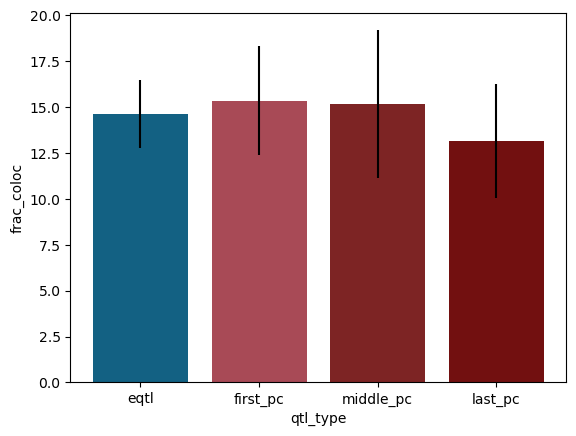

In [212]:
barplot = sns.barplot(frac_coloc, y='frac_coloc', x='qtl_type', hue='qtl_type', palette={'eqtl':'#016895', 'first_pc':'#B83A4B', 'middle_pc':'#8C1515', 'last_pc':'#820000'})
# Iterating over the bars and adding the error bars
for i, bar in enumerate(barplot.patches):
    barplot.errorbar(x=bar.get_x() + bar.get_width() / 2,
                     y=bar.get_height(),
                     yerr=frac_coloc['error'].iloc[i],
                     ecolor='black',
                     fmt='none')

In [194]:
cluster_grouped = qtl_grouped.groupby(['cluster_id', 'type']).agg({'coloc_sig':'sum', 'qtl_sig':'sum'}).reset_index()
sig_count = {'eqtl':sum((cluster_grouped['type']=='eqtl')& (cluster_grouped['coloc_sig'] > 0)), 
               'pcqtl': sum((cluster_grouped['type']=='pcqtl')& (cluster_grouped['coloc_sig'] > 0))}


total_count = {'eqtl':sum((cluster_grouped['type']=='eqtl')& (cluster_grouped['qtl_sig'] > 0)), 
               'pcqtl': sum((cluster_grouped['type']=='pcqtl')& (cluster_grouped['qtl_sig'] > 0))}

frac_coloc_cluster = pd.DataFrame({'total_count':total_count, 'sig_count':sig_count})
frac_coloc_cluster.reset_index(names=['qtl_type'], inplace=True)
frac_coloc_cluster['frac_coloc'] = frac_coloc_cluster['sig_count']/frac_coloc_cluster['total_count']*100
frac_coloc_cluster['frac_se'] = np.sqrt(frac_coloc_cluster['frac_coloc']/100*(1-frac_coloc_cluster['frac_coloc']/100)/frac_coloc_cluster['total_count'])*100
frac_coloc_cluster['error'] = frac_coloc_cluster['frac_se']*2

In [216]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(frac_coloc_cluster[['total_count', 'sig_count']].to_numpy())

print(f"P-value: {p}")
# Calculate standard errors
# SE = sqrt[ p(1 - p) / n ]
SE_eqtl = np.sqrt((0.14619493*(1-0.14619493))/1498)
SE_pcqtl = np.sqrt((0.14542837*(1-0.14542837))/1389)

print(f"Standard Error for eqtl: {SE_eqtl}")
print(f"Standard Error for pcqtl: {SE_pcqtl}")

P-value: 0.5521131526440584
Standard Error for eqtl: 0.009128293887354961
Standard Error for pcqtl: 0.00945905347949597


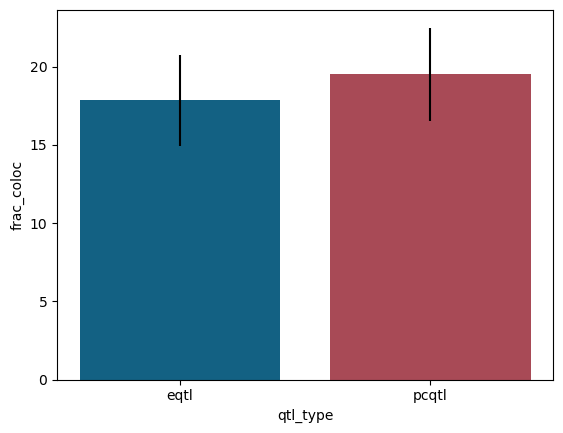

In [208]:
# group by cluster
barplot = sns.barplot(frac_coloc_cluster, y='frac_coloc', x='qtl_type', hue='qtl_type', palette={'eqtl':'#016895', 'pcqtl':'#B83A4B'})

# Iterating over the bars and adding the error bars
for i, bar in enumerate(barplot.patches):
    barplot.errorbar(x=bar.get_x() + bar.get_width() / 2,
                     y=bar.get_height(),
                     yerr=frac_coloc_cluster['error'].iloc[i],
                     ecolor='black',
                     fmt='none')

In [214]:
# look at how this differs based on cluster correlation

clusters = [load_clusters_annotated(config, tissue_id) for tissue_id in tissue_ids]
clusters = pd.concat([df.assign(tissue_id=n) for df, n in zip(clusters, tissue_ids)])


In [261]:
clusters.columns

Index(['N_genes', 'Transcripts', 'Perc_cor', 'Mean_cor', 'Mean_pos_cor',
       'Mean_neg_cor', 'Chromosome', 'Tissue', 'cluster_size',
       'cluster_tss_size', 'start', 'end', 'tss_min', 'tss_max', 'tss_inter',
       'gene_inter', 'num_tads_gene', 'num_tads_tss', 'has_tads_gene',
       'has_tads_tss', 'num_bidirectional_promoter',
       'has_bidirectional_promoter', 'num_abc_genes', 'num_shared_enhancers',
       'num_shared_strong_enhancers', 'num_enhancers', 'num_strong_enhancers',
       'has_shared_enhancer', 'has_shared_strong_enhancer',
       'has_shared_very_strong_enhancer', 'num_paralog', 'has_paralog',
       'num_cross_map', 'has_cross_map', 'num_shared_go_all',
       'has_shared_go_all', 'num_shared_go_any', 'has_shared_go_any',
       'max_jaccard_unweighted', 'max_jaccard_weighted',
       'has_high_jaccard_unweighted', 'has_high_jaccard_weighted',
       'mean_jaccard_unweighted', 'mean_jaccard_weighted', 'interval',
       'num_ctcf_peak', 'has_ctcf_peak', 'num_

In [241]:
qtl_grouped = pd.merge(clusters, qtl_grouped, left_on='cluster_id', right_on='cluster_id', how='right')

In [264]:
qtl_grouped['corr_group'] = pd.qcut(qtl_grouped['Mean_cor'], q=3, labels=False)

In [265]:
frac_colocs = []
for i in range(3):
    frac_colocs.append(get_frac_coloc(qtl_grouped[qtl_grouped['corr_group']==i]))
frac_coloc_corr_split = pd.concat(frac_colocs, keys=range(4), names=['corr_group', 'idx']).reset_index()

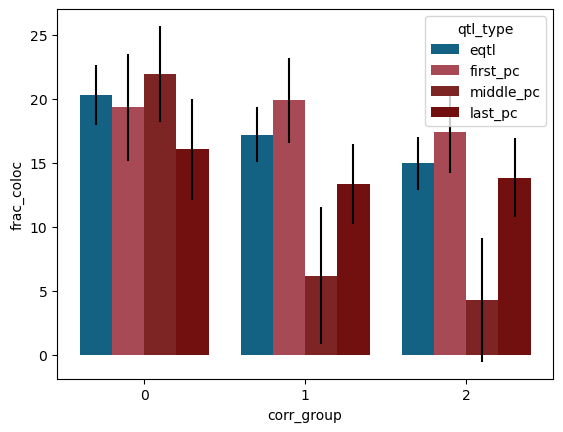

In [266]:
hue_order = ['eqtl', 'first_pc', 'middle_pc', 'last_pc']
barplot = sns.barplot(frac_coloc_corr_split, y='frac_coloc', x='corr_group', hue='qtl_type', hue_order=hue_order, palette={'eqtl':'#016895', 'first_pc':'#B83A4B', 'middle_pc':'#8C1515', 'last_pc':'#820000'})

# Dealing with the x location of bars manually:
x=-0.3
for idx, group in frac_coloc_corr_split.groupby('corr_group'):
    for this_type in hue_order:
        qt = group[group['qtl_type'] == this_type]
        plt.errorbar(x=x, y=qt['frac_coloc'], yerr=qt['error'], fmt='none', c='black')
        x += 0.2
    x += 0.2
plt.show()

In [294]:
idx_col = 'has_shared_enhancer'
num_groups = 2
sub_qtl_grouped = qtl_grouped[qtl_grouped['num_abc_genes']>0]

In [295]:
frac_colocs = []
for i in range(num_groups):
    frac_colocs.append(get_frac_coloc(sub_qtl_grouped[sub_qtl_grouped[idx_col]==i]))
frac_coloc_corr_split = pd.concat(frac_colocs, keys=range(num_groups), names=[idx_col, 'idx']).reset_index()

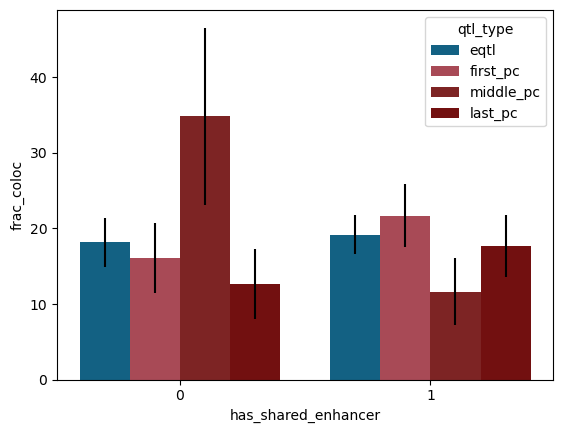

In [296]:
hue_order = ['eqtl', 'first_pc', 'middle_pc', 'last_pc']
barplot = sns.barplot(frac_coloc_corr_split, y='frac_coloc', x=idx_col, hue='qtl_type', hue_order=hue_order, palette={'eqtl':'#016895', 'first_pc':'#B83A4B', 'middle_pc':'#8C1515', 'last_pc':'#820000'})

# Dealing with the x location of bars manually:
x=-0.3
for idx, group in frac_coloc_corr_split.groupby(idx_col):
    for this_type in hue_order:
        qt = group[group['qtl_type'] == this_type]
        plt.errorbar(x=x, y=qt['frac_coloc'], yerr=qt['error'], fmt='none', c='black')
        x += 0.2
    x += 0.2
plt.show()